In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'InfraredSolarModules/module_metadata.json'

In [3]:
df = pd.read_json(path)

In [4]:
df.head()

,13357,13356,19719,11542,11543,11540,11541,11546,11547,11544,...,8483,8484,8485,8486,8487,8488,8489,7464,18065,13354
image_filepath,images/13357.jpg,images/13356.jpg,images/19719.jpg,images/11542.jpg,images/11543.jpg,images/11540.jpg,images/11541.jpg,images/11546.jpg,images/11547.jpg,images/11544.jpg,...,images/8483.jpg,images/8484.jpg,images/8485.jpg,images/8486.jpg,images/8487.jpg,images/8488.jpg,images/8489.jpg,images/7464.jpg,images/18065.jpg,images/13354.jpg
anomaly_class,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,...,Vegetation,Vegetation,Vegetation,Vegetation,Vegetation,Vegetation,Vegetation,Cracking,No-Anomaly,No-Anomaly


In [5]:
df = df.T.sort_index()


In [6]:
df.head()

,image_filepath,anomaly_class
0,images/0.jpg,Offline-Module
1,images/1.jpg,Offline-Module
2,images/2.jpg,Offline-Module
3,images/3.jpg,Offline-Module
4,images/4.jpg,Offline-Module


In [7]:
anomalias = df.anomaly_class.value_counts()
print(anomalias)

No-Anomaly        10000
Cell               1877
Vegetation         1639
Diode              1499
Cell-Multi         1288
Shadowing          1056
Cracking            940
Offline-Module      827
Hot-Spot            249
Hot-Spot-Multi      246
Soiling             204
Diode-Multi         175
Name: anomaly_class, dtype: int64


In [8]:
num_images_per_class = 5
filtered_df = pd.DataFrame()

# Iterar sobre cada classe de anomalia
for class_name in df['anomaly_class'].unique():
    # Filtrar as primeiras 5 imagens da classe de anomalia atual
    class_images = df[df['anomaly_class'] == class_name].head(num_images_per_class)
    # Adicionar as imagens filtradas ao DataFrame final
    filtered_df = pd.concat([filtered_df, class_images])

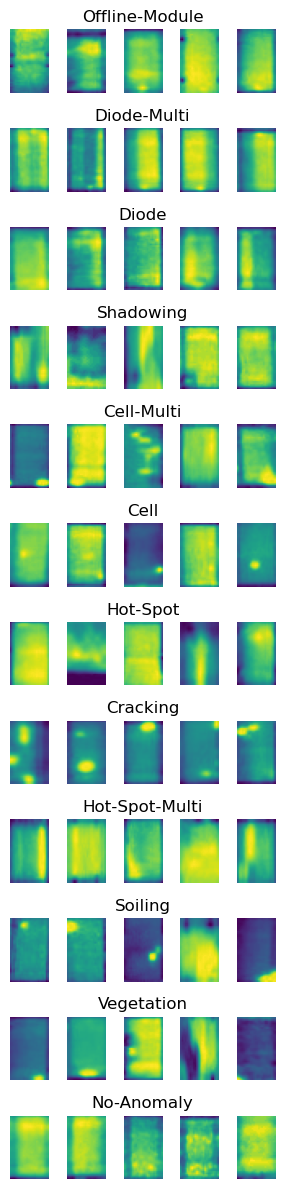

In [9]:
# Caminho da pasta que contém as imagens
image_folder = "InfraredSolarModules/"

# Filtrar o DataFrame para obter as primeiras 5 imagens de cada classe de anomalia
num_images_per_class = 5

# Configurar a figura com subplots para cada classe de anomalia
fig, axes = plt.subplots(nrows=len(filtered_df['anomaly_class'].unique()), ncols=num_images_per_class, figsize=(3, 12))



# Iterar sobre cada classe de anomalia
for i, class_name in enumerate(filtered_df['anomaly_class'].unique()):
    # Filtrar as imagens da classe de anomalia atual
    class_images = filtered_df[filtered_df['anomaly_class'] == class_name]
    # Iterar sobre cada imagem da classe de anomalia atual
    for j, (_, image_row) in enumerate(class_images.iterrows()):
        # Obter o ID da imagem
        image_id = image_row['image_filepath']

        # Construir o caminho completo da imagem
        image_path = os.path.join(image_folder, image_id)

        # Carregar a imagem usando o caminho completo
        image = plt.imread(image_path)

        # Exibir a imagem no subplot correspondente
        axes[i, j].imshow(image)
        axes[i, j].axis('off')

    # Adicionar um título com a classe de anomalia
    axes[i, 2].set_title(class_name)

# Ajustar o layout dos subplots
plt.tight_layout()

plt.savefig('5imagesperclass.png')
# Exibir a figura
plt.show()

